In [1]:
import cv2
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
bboxes = pd.read_csv('../data/BBox_List_2017.csv')
train_ids = pd.read_csv('../data/train_val_list.txt')
test_ids = pd.read_csv('../data/test_list.txt')

In [3]:
bboxes.sample(10)

,image_id,label,x,y,w,h
220,00017893_005.png,Cardiomegaly,386.711864,365.288136,491.389831,406.779661
634,00018427_004.png,Mass,532.046561,328.330159,107.276190,100.774603
6,00012515_002.png,Atelectasis,289.084746,638.137861,83.525424,56.406780
975,00010815_006.png,Atelectasis,311.580451,240.260747,153.600000,244.622222
296,00028607_000.png,Cardiomegaly,404.182011,302.323810,497.371429,443.191534
236,00015563_011.png,Cardiomegaly,320.744974,484.368254,500.622222,450.776720
60,00007676_002.png,Atelectasis,360.677966,439.629386,82.440678,136.677966
221,00028873_004.png,Cardiomegaly,321.627119,320.813559,439.322034,335.186441
962,00014626_017.png,Pneumothorax,271.983069,134.366138,101.858201,150.620106
50,00008005_004.png,Atelectasis,636.203390,590.409047,87.864407,174.644068


Classes:  {'Infiltrate', 'Nodule', 'Mass', 'Pneumonia', 'Effusion', 'Atelectasis', 'Cardiomegaly', 'Pneumothorax'}


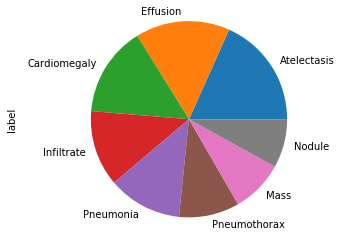

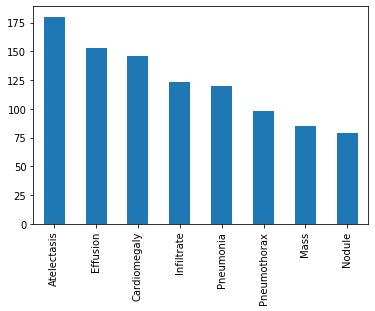

In [4]:
print('Classes: ', set(bboxes.label.values))

bboxes.label.value_counts().plot(kind='pie')
plt.axis('equal')
plt.show()

bboxes.label.value_counts().plot(kind='bar')
plt.show()

In [5]:
def plot_image_bboxes(img_id: str = ''):
    box_color = (220, 0, 0)
    
    img_name = f'{img_id}.png'
    image = cv2.imread(f'../data/images/{img_name}', cv2.IMREAD_COLOR)
    
    image_bboxes = bboxes.loc[bboxes['image_id'] == img_name,
                              ['x', 'y', 'w', 'h']].values
    image_labels = bboxes.loc[bboxes['image_id'] == img_name, 'label'].values
    
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))

    for box, label in zip(image_bboxes, image_labels):
        print (label)
        x1, y1, w, h = box
        x2 = x1 + w
        y2 = y1 + h
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        cv2.rectangle(image, (x1, y1), (x2, y2), box_color, 3)
        cv2.putText(image,
                    label,
                    (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX,  # font face
                    1.2,                       # font scale
                    box_color,                 # text color
                    thickness = 2)

    ax.set_axis_off()
    ax.imshow(image)

In [6]:
bboxes.image_id.value_counts()[:5]

00010277_000.png    4
00005066_030.png    3
00020482_032.png    3
00018253_059.png    3
00008814_010.png    3
Name: image_id, dtype: int64

Infiltrate
Mass
Pneumothorax


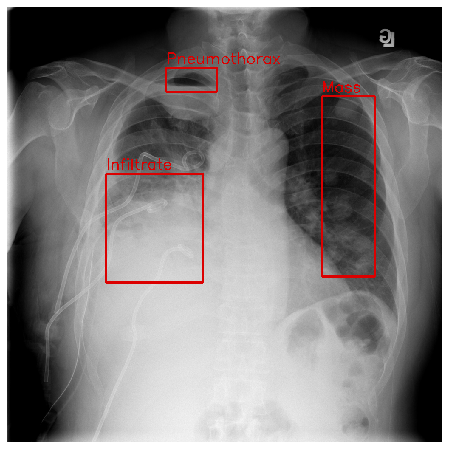

In [7]:
plot_image_bboxes('00012376_010')